In [1]:
# pip install git+https://github.com/LucianoPereiraValenzuela/ECC_2025_testing.git 

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from qiskit import QuantumCircuit
# from qiskit.primitives import Sampler 
from qiskit_aer.primitives import Sampler 
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit import ParameterVector
from qiskit_algorithms.optimizers import COBYLA
from qiskit_machine_learning.circuit.library import RawFeatureVector

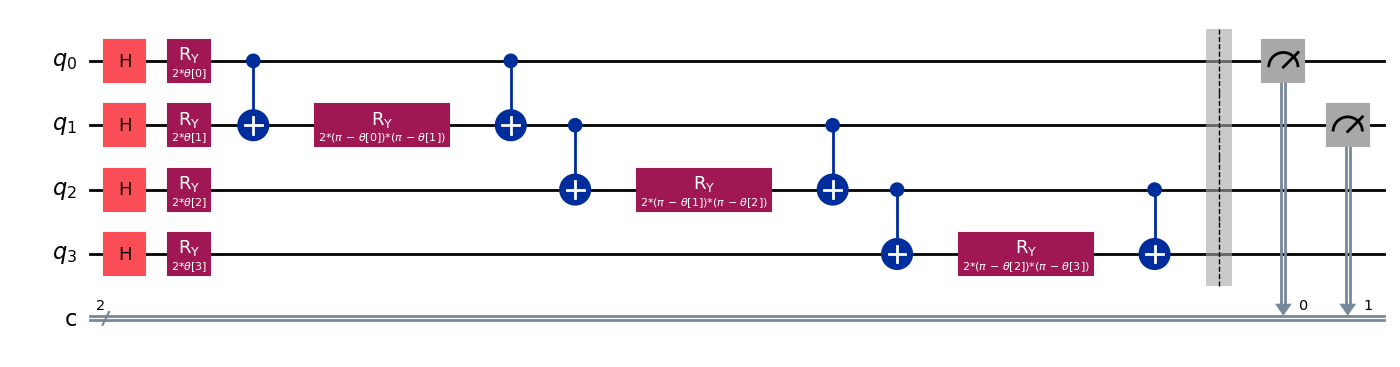

In [4]:
num_qubits = 4

theta = ParameterVector(r'$\theta$',4)

qc_dato = QuantumCircuit(4,2)
qc_dato.h(range(4))
for j in range(4):
    qc_dato.ry( 2*theta[j], j )
for j in range(3):
    qc_dato.cx(j,j+1)
    qc_dato.ry( 2*(np.pi-theta[j])*(np.pi-theta[j+1]), j+1 )
    qc_dato.cx(j,j+1)

qc_dato.barrier()
qc_dato.measure([0,1],[0,1])

qc_dato.draw('mpl')

In [5]:
backend = Sampler()

def fun( params ):

    job   = backend.run( qc_dato, params, shots=2**6 )
    probs = job.result().quasi_dists[0].get(00, 0 )
    return 1-probs 


In [6]:
fun([0,0,0,0]), fun([1,1,1,1])

(0.96875, 0.96875)

In [7]:
xs = []
def callback(x):
    xs.append(fun(x))

optimizer = COBYLA( callback=callback)
results   = optimizer.minimize( fun, [0,0,0,0] )

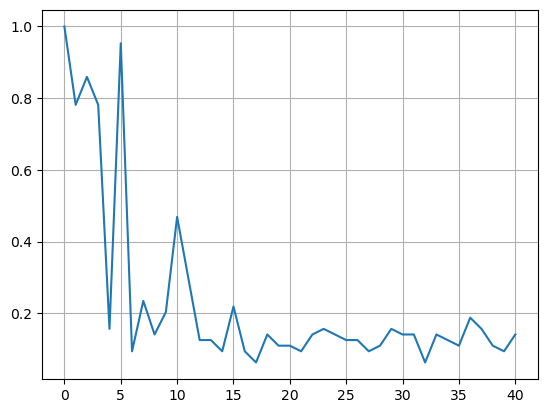

In [8]:
plt.plot( xs ) 
plt.grid()

In [9]:
from keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D
from keras import Input, Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [10]:
encoding_dim = 15 
input_img = Input(shape=(784,))
# encoded representation of input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# decoded representation of code 
decoded = Dense(784, activation='sigmoid')(encoded)
# Model which take input image and shows decoded images
autoencoder = Model(input_img, decoded)

In [11]:
# This model shows encoded images
encoder = Model(input_img, encoded)
# Creating a decoder model
encoded_input = Input(shape=(encoding_dim,))
# last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [12]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [14]:
mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [15]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


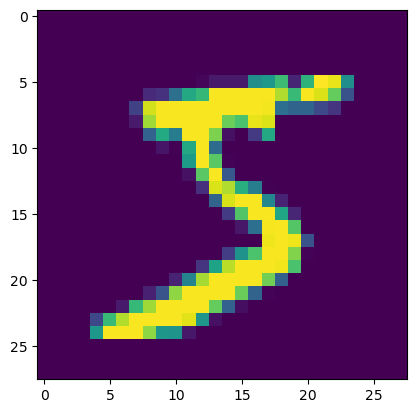

In [16]:
plt.imshow(x_train[0].reshape(28,28))


In [17]:
autoencoder.fit(x_train, x_train,
                epochs=15,
                batch_size=256,
                validation_data=(x_test, x_test))

Epoch 1/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4168 - val_loss: 0.2211
Epoch 2/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2093 - val_loss: 0.1824
Epoch 3/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1791 - val_loss: 0.1656
Epoch 4/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1639 - val_loss: 0.1543
Epoch 5/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1538 - val_loss: 0.1485
Epoch 6/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1487 - val_loss: 0.1453
Epoch 7/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1459 - val_loss: 0.1430
Epoch 8/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1438 - val_loss: 0.1409
Epoch 9/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1417 - val_loss: 0.1392
Epoch 10/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1398 - val_loss: 0.1376
Epoch 11/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1386 - val_loss: 0.1364
Epoch 12/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step


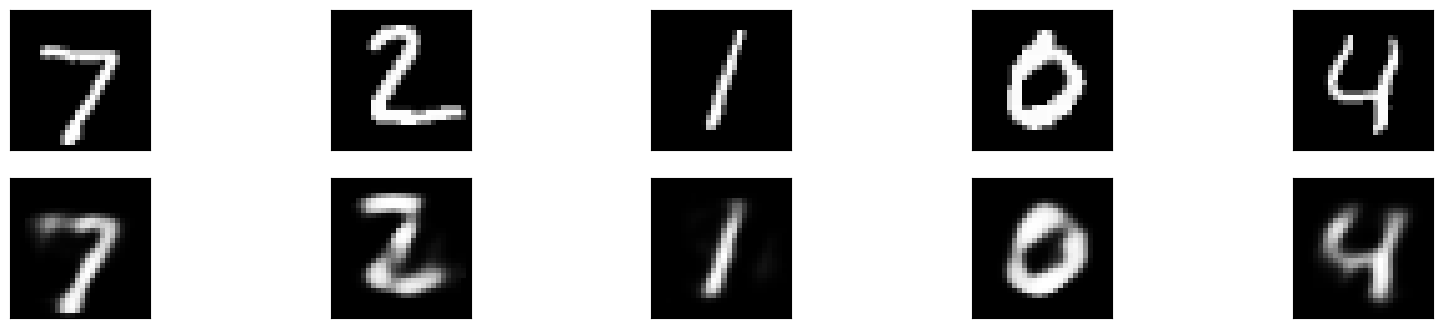

In [18]:
encoded_img = encoder.predict(x_test)
decoded_img = decoder.predict(encoded_img)
plt.figure(figsize=(20, 4))
for i in range(5):
    # Display original
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display reconstruction
    ax = plt.subplot(2, 5, i + 1 + 5)
    plt.imshow(decoded_img[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()